<a href="https://colab.research.google.com/github/Yeen000/Aiffel/blob/master/2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
!pip install koreanize-matplotlib

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [ ]:
# 여기서 사용하지 않아서 주석처리
# ais = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/aisles.csv")
# dep = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/departments.csv")
# oprior = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/order_products__prior.csv")
# otrain = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/order_products__train.csv")
# ord = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/orders.csv")
# prod = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/IM/products.csv")

# 데이터 확인
# print("Aisles\n", ais.head(), "\n")
# print("Departments\n", dep.head(), "\n")
# print("Order Prior\n", oprior.head(), "\n")
# print("Order Train\n", otrain.head(), "\n")
# print("Orders\n", ord.head(), "\n")
# print("Products\n", prod.head(), "\n")

In [ ]:
# 추가된 테이블
u_pord = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/u_prod.csv") #가격정보생성테이블
f_orders = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/f_orders.csv") #최종 orders 테이블
users = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/users.csv") #user 테이블

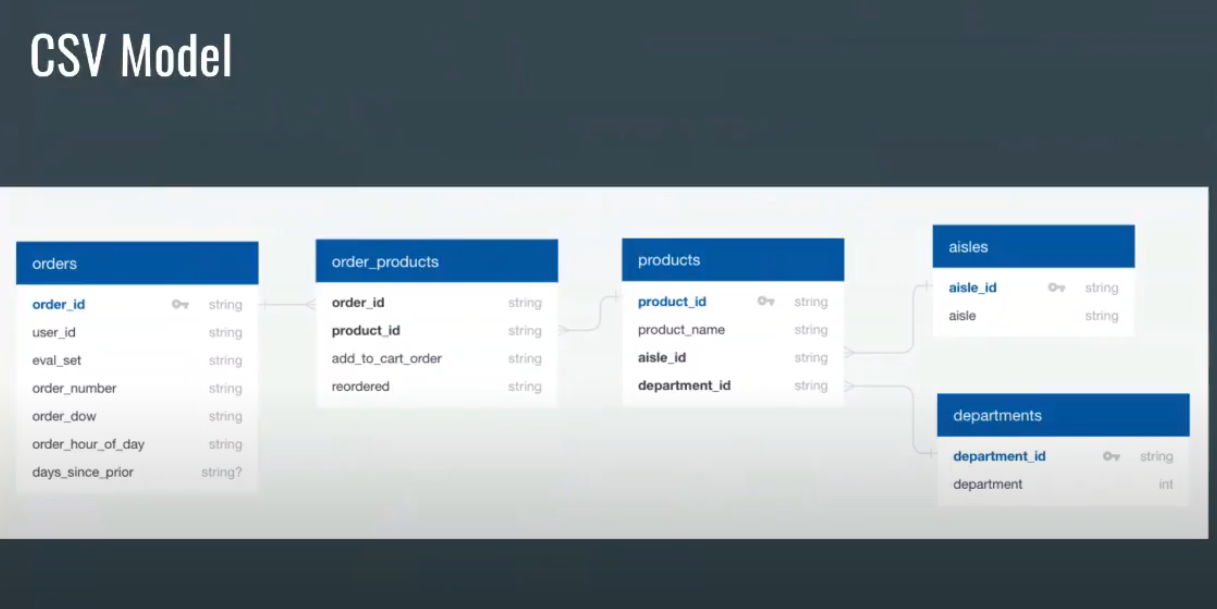

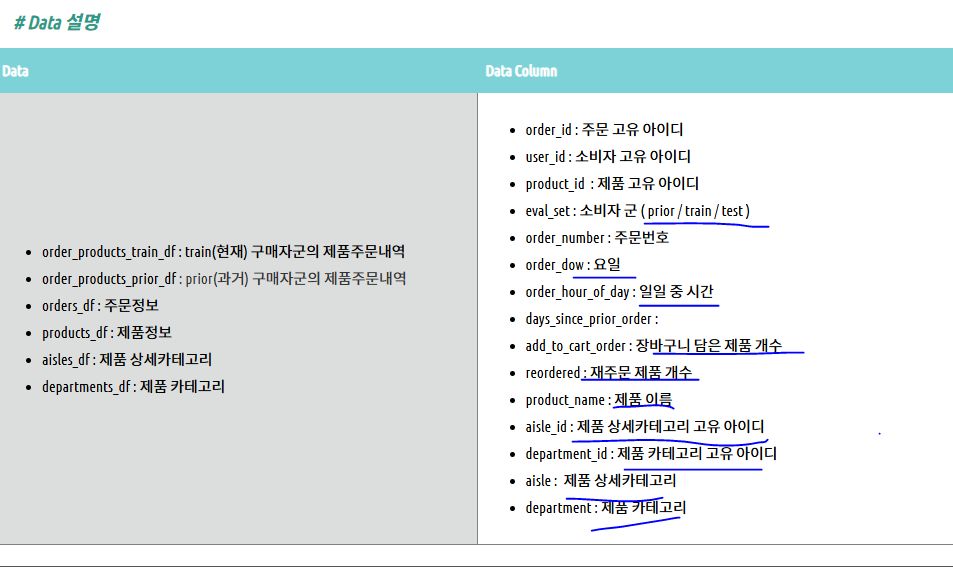

In [ ]:
users.head()

,user_id,total_reorder_count,avg_cart_order_cnt,avg_reorder_cnt,avg_reorder_price,avg_days_since_prior_order,recency,frequency,monetary
0,1,10,6.363636,4.636364,38.622727,17.272727,30.0,11,16.638182
1,2,13,15.066667,7.000000,92.113333,15.200000,30.0,15,40.797333
2,3,11,7.333333,4.583333,69.029167,11.083333,21.0,12,39.950833
3,4,1,3.600000,0.200000,3.518000,11.000000,21.0,5,75.114000
4,5,4,9.200000,3.600000,54.768000,9.200000,19.0,5,31.908000


#### USER 테이블 컬럼 해석
user_id	: 사용자 ID  
total_reorder_count	: 총 재구매 발생 횟수  
avg_cart_order_cnt	: 평균 장바구니 크기 (품목 수)  
avg_reorder_cnt	: 평균 재구매 품목 수  
avg_reorder_price	: 평균 재구매 가격  
avg_days_since_prior_order :	평균 재구매 주기 (이전 주문 후 평균 경과 일수)  
recency	: 가장 최근 구매 이후 지난 일수  
frequency	: 총 주문 횟수    
monetary	: 평균 구매 가격 (거래 금액)  

# F_ORDERS 기준 EDA  
  
-  컬럼해석
order_id : 주문 고유 아이디  
user_id :	소비자 고유 아이디  
eval_set :	소비자 군 (prior / train / test)  
order_number	주문번호  
order_dow	: 요일  
order_hour_of_day :	일일 중 시간  
days_since_prior_order	: 이전 주문 후 경과 일수  
cart_order_cnt	: 장바구니에 담은 제품 개수  
reorder_cnt	: 재구매 품목 수  
total_price :	총 거래 금액  
max_price	: 가장 높은 제품 가격  
total_reordered_price	: 총 재구매 가격  
is_reorder	: 재구매 여부 (1: 재구매, 0: 신규구매)  

In [ ]:
f_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,cart_order_cnt,reorder_cnt,total_price,max_price,total_reordered_price,is_reorder
0,2539329,1,prior,1,2,8,0.0,5,0,12.06,42.11,0.00,0
1,2398795,1,prior,2,3,7,15.0,6,3,35.37,75.12,32.72,1
2,473747,1,prior,3,3,12,21.0,5,3,12.06,39.80,23.54,1
3,2254736,1,prior,4,4,7,29.0,5,5,12.06,36.71,36.71,1
4,431534,1,prior,5,4,15,28.0,8,5,35.37,106.09,66.59,1


## 가설1 -  요일별 주문패턴 (주문빈도)에는 유의미한 차이가 있을 것이다.

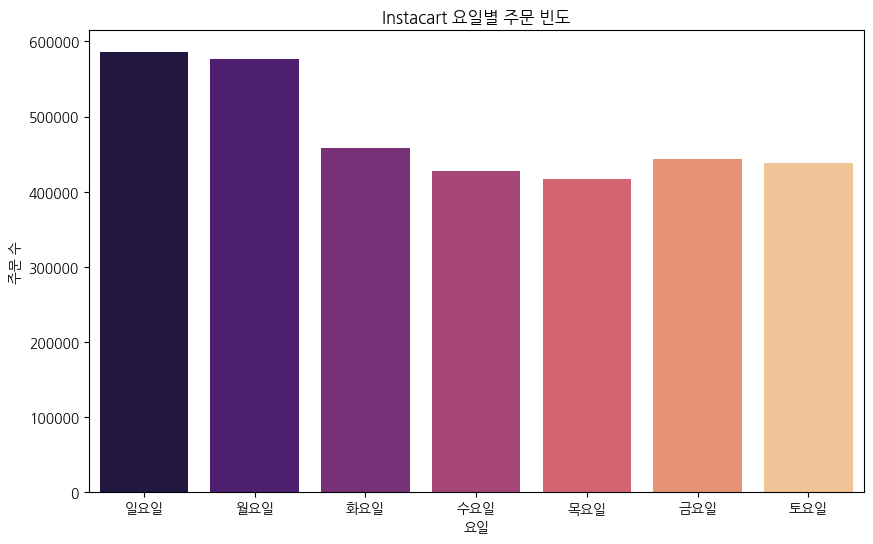

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(x=f_orders['order_dow'], palette="magma")

# 요일 라벨 설정
plt.xticks(ticks=range(7), labels=["일요일", "월요일", "화요일", "수요일", "목요일", "금요일", "토요일"])

plt.xlabel("요일")
plt.ylabel("주문 수")
plt.title("Instacart 요일별 주문 빈도")
plt.show()

In [ ]:
# 심화분석
import pandas as pd
import numpy as np
import scipy.stats as stats

# 1️⃣ 기본 통계 분석
def analyze_order_stats(f_orders):
    # 요일별 주문 수 집계
    weekday_orders = f_orders.groupby("order_dow")["order_id"].count()

    # 기본 통계 계산
    stats_summary = weekday_orders.describe()

    # 범위(range) 및 사분위수 계산
    stats_summary["range"] = stats_summary["max"] - stats_summary["min"]
    stats_summary["25%"] = weekday_orders.quantile(0.25)
    stats_summary["50% (median)"] = weekday_orders.median()
    stats_summary["75%"] = weekday_orders.quantile(0.75)

    return stats_summary

# 2️⃣ 요일별 구매 패턴 분석
def analyze_purchase_patterns(f_orders, users):
    # 요일별 평균 재구매율 (is_reorder 평균)
    reorder_rates = f_orders.groupby("order_dow")["is_reorder"].mean().reset_index()
    reorder_rates.columns = ["order_dow", "avg_reorder_rate"]

    # 요일별 평균 구매 가격 (monetary 평균)
    monetary_avg = f_orders.groupby("order_dow")["total_price"].mean().reset_index()
    monetary_avg.columns = ["order_dow", "avg_monetary"]

    # 데이터 병합
    purchase_patterns = pd.merge(reorder_rates, monetary_avg, on="order_dow")
    return purchase_patterns

# 3️⃣ ANOVA (요일별 구매 횟수 차이 검정)
def perform_anova(f_orders):
    # 요일별 주문 데이터 리스트 생성
    order_counts_by_day = [
        f_orders[f_orders["order_dow"] == dow]["order_id"].count() for dow in range(7)
    ]

    # ANOVA 검정 수행
    anova_result = stats.f_oneway(*order_counts_by_day)

    return {"F-statistic": anova_result.statistic, "p-value": anova_result.pvalue}

In [ ]:
# 1️⃣ 기본 통계 분석 실행
order_stats = analyze_order_stats(f_orders)
print("📊 요일별 주문 수 기본 통계 분석:\n", order_stats)

# 2️⃣ 요일별 구매 패턴 분석 실행
purchase_patterns = analyze_purchase_patterns(f_orders, users)
print("\n📈 요일별 구매 패턴 분석:\n", purchase_patterns)

📊 요일별 주문 수 기본 통계 분석:
 count                7.000000
mean            478011.857143
std              71396.149692
min             417171.000000
25%             432918.000000
50%             443388.000000
75%             517225.500000
max             585237.000000
range           168066.000000
50% (median)    443388.000000
Name: order_id, dtype: float64

📈 요일별 구매 패턴 분석:
    order_dow  avg_reorder_rate  avg_monetary
0          0          0.889218     36.417374
1          1          0.886465     35.286239
2          2          0.876428     34.515663
3          3          0.873813     34.572641
4          4          0.875869     35.122058
5          5          0.881305     35.897262
6          6          0.881654     36.485047


In [ ]:
# 3️⃣ ANOVA 분석 실행
import numpy as np
from scipy.stats import f_oneway

# 요일별 데이터 그룹화 (요일 순서대로 정렬)
grouped_data = f_orders.groupby('order_dow')['order_id'].apply(list)
grouped_data = grouped_data.reindex(np.arange(7))  # 0~6 순서대로 정렬

# ANOVA 실행 (결측값이 있으면 자동 제거)
anova_result = f_oneway(*grouped_data.dropna())

# 결과 출력
print(f"F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}")

F-statistic: 1.2592358471891836, p-value: 0.2725166525824301


🎯 ANOVA 결과 해석  
	•	F-statistic: 1.259 → 요일별 주문 수 차이가 있긴 하지만 크지 않음  
	•	p-value: 0.2725 → 유의수준(0.05)보다 큼 → 요일별 주문 수 차이가 통계적으로 유의하지 않음  

  ### 추가가설 : 그렇다면 주말 vs 평일은 유의미한 패턴 차이가 있을까?

In [ ]:
# 주말 (토,일) vs 평일(월~금)으로 나눠서 다시 분석
f_orders['weekend'] = f_orders['order_dow'].apply(lambda x: 1 if x in [0, 6] else 0)
from scipy.stats import ttest_ind

weekend_orders = f_orders[f_orders['weekend'] == 1]['order_id']
weekday_orders = f_orders[f_orders['weekend'] == 0]['order_id']

ttest_result = ttest_ind(weekend_orders, weekday_orders, equal_var=False)
print(f"T-statistic: {ttest_result.statistic}, p-value: {ttest_result.pvalue}")

T-statistic: 0.6520475636575154, p-value: 0.5143705659557856


P-value가 더 높아짐  
결론: 실제로 주말과 평일의 차이가 크지 않음 (유의미한 패턴이 아니다)  
	•	예를 들어, 사람들이 특정 요일(주말이나 월요일 등)에 몰려서 장을 보는 게 아니라, 일정한 주기로 주문하는 경우 이런 결과가 나올 수 있다.  
	•	특히 온라인 장보기 서비스는 오프라인 마트보다 요일별 변동이 적을 가능성이 높다.  

### [ 1번 가설 기각 ]

## 가설 2 - 시간대별 주문분포(주문수) 에는 유의미한 차이가 있을 것이다.  

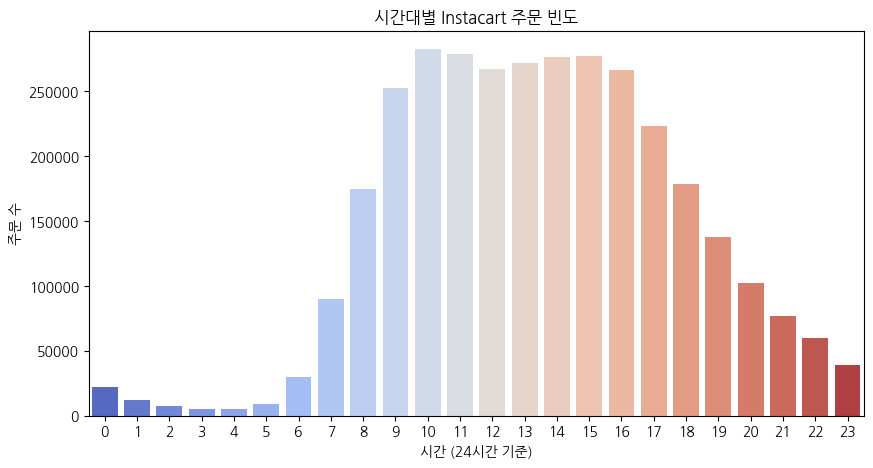

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.countplot(x=f_orders['order_hour_of_day'], palette="coolwarm")

plt.xlabel("시간 (24시간 기준)")
plt.ylabel("주문 수")
plt.title("시간대별 Instacart 주문 빈도")
plt.xticks(range(0, 24))  # 0~23시간
plt.show()

✅ 1. 카이제곱 검정 (Chi-Square Goodness-of-Fit Test)

이 검정을 사용하면 시간대별 주문량이 랜덤(균등)하게 발생하는지, 아니면 특정 패턴이 있는지 확인 가능   

📌 검정 가설  
	•	H₀(귀무가설): 주문량이 모든 시간대에 균등하게 발생한다.  
	•	H₁(대립가설): 특정 시간대에 주문이 몰리는 패턴이 있다.  

  주의: 카이제곱 검정에서는 실제 값(Observed)과 기대 값(Expected)의 총합이 정확히 같아야 하므로, 기대값을 보정해 주어야 함  


In [ ]:
import numpy as np
import scipy.stats as stats

# 시간대별 주문 수 집계
order_counts = f_orders['order_hour_of_day'].value_counts().sort_index()

# 기대값: 모든 시간대에 동일한 주문량이 있다고 가정한 경우 (균등분포)
expected_counts = np.full_like(order_counts, order_counts.mean())

# 기대값을 실제 주문 총합과 동일하게 스케일 조정
expected_counts = expected_counts * (order_counts.sum() / expected_counts.sum())

# 카이제곱 검정 실행
chi2_stat, p_value = stats.chisquare(order_counts, expected_counts)

print(f"Chi-Square Statistic: {chi2_stat}, p-value: {p_value}")

Chi-Square Statistic: 2055569.3544287456, p-value: 0.0


🎯 카이제곱 검정 결과 해석  
	•	Chi-Square Statistic: 2,055,569 → 매우 큰 값  
	•	p-value: 0.0 (즉, 0에 수렴) ✅  

➡️ 시간대별 주문 분포는 균등하지 않으며, 특정 시간대에 몰리는 경향이 통계적으로 매우 유의미함! 🚀  
  

📌 해석  
	1.	주문이 균등하게 분포하지 않음  
	•	귀무가설(H₀): “모든 시간대에 주문이 균등하게 발생한다” → 기각됨!  
	•	즉, Instacart에서 특정 시간대에 주문이 몰리는 패턴이 명확하게 존재함.  
	2.	어떤 시간대에 주문이 몰리는지 확인 필요  
	•	기존에 시각화한 시간대별 주문량 그래프를 보면,오전 9-17시 사이에 주문이 집중되는 경향이 있어.  
	•	반대로 새벽(0~6시)와 밤(21시 이후)은 주문이 적음.  

### 추가가설 - 주말과 평일의 시간별 주문 패턴이 다를까?

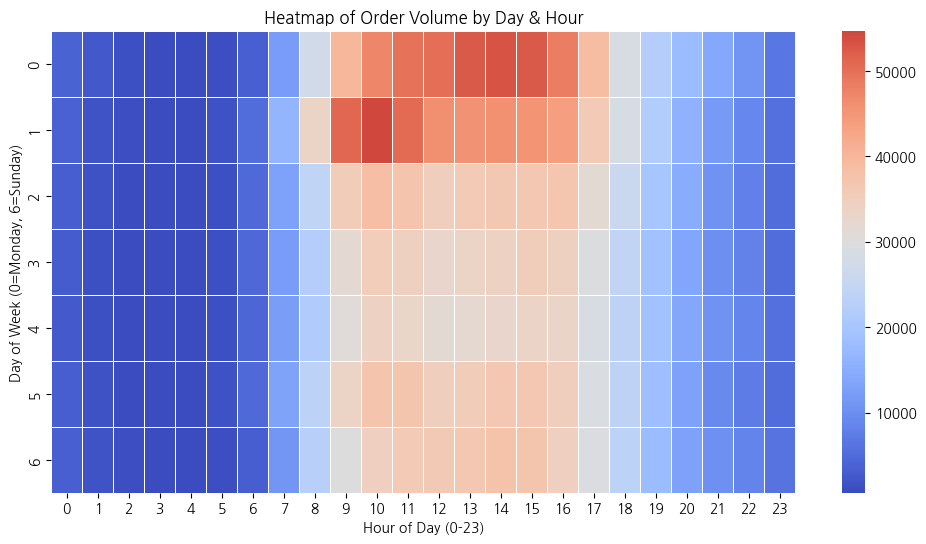

In [ ]:
# 요일 & 시간대별 주문량 히트맵으로 시각화

# 요일, 시간별로 묶어서 주문 수(count) 계산
grouped = f_orders.groupby(['order_dow', 'order_hour_of_day'])["order_id"].count().reset_index()

# pivot 테이블 생성 (요일을 행, 시간을 열로 설정)
grouped_pivot = grouped.pivot(index='order_dow', columns='order_hour_of_day', values='order_id')
grouped_pivot

# 주문량 히트맵 시각화
plt.figure(figsize=(12, 6))
sns.heatmap(grouped_pivot, cmap="coolwarm", center=30000, annot=False, linewidths=0.5)

# 그래프 제목 및 라벨 설정
plt.xlabel("Hour of Day (0-23)")
plt.ylabel("Day of Week (0=Monday, 6=Sunday)")
plt.title("Heatmap of Order Volume by Day & Hour")

# 그래프 표시
plt.show()

# 시간대는 9시 ~ 16시가 가장 높으며
# 요일은 월, 화

# 특히 월은 오후 1시~3시/ 화는 오전 10시가 가장 높음

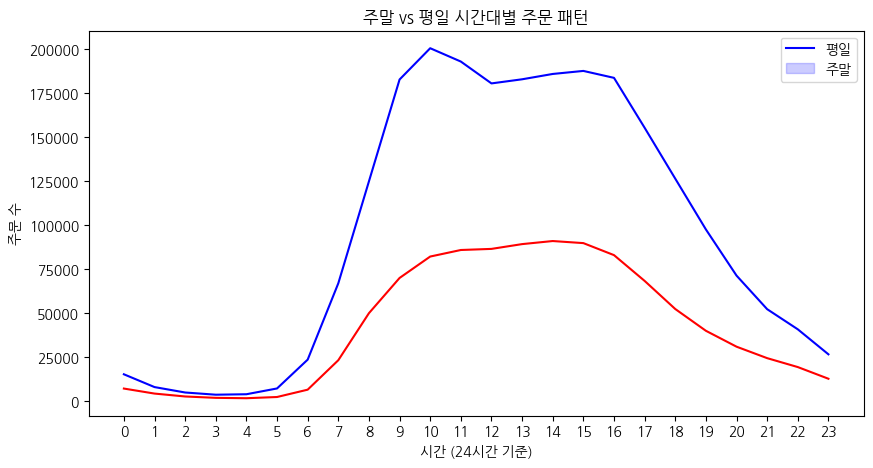

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 주말 & 평일 구분
f_orders["weekend"] = f_orders["order_dow"].apply(lambda x: 1 if x in [0, 6] else 0)

# 시간대별 주문 수 집계
order_counts = f_orders.groupby(["order_hour_of_day", "weekend"])["order_id"].count().reset_index()

# 시각화
plt.figure(figsize=(10,5))

sns.lineplot(data=order_counts, x="order_hour_of_day", y="order_id", hue="weekend", palette=["blue", "red"])

plt.xlabel("시간 (24시간 기준)")
plt.ylabel("주문 수")
plt.title("주말 vs 평일 시간대별 주문 패턴")
plt.xticks(range(0, 24))
plt.legend(labels=["평일", "주말"])
plt.show()

* 해석
- 평일 주문량이 훨씬 많다 (특히 오전 0시~17시)
- 주말은 주문량이 낮고 완만한 곡선을 그림 (특정 시간에 안몰림)

In [ ]:
# T검정으로 통계적으로 차이가 유의미한지 검정함

# 주말과 평일 데이터를 시간대별로 그룹화
weekend_orders = f_orders[f_orders["weekend"] == 1].groupby("order_hour_of_day")["order_id"].count().values
weekday_orders = f_orders[f_orders["weekend"] == 0].groupby("order_hour_of_day")["order_id"].count().values

# 두 그룹의 길이가 다를 경우 맞춰주기
min_length = min(len(weekend_orders), len(weekday_orders))
weekend_orders = weekend_orders[:min_length]
weekday_orders = weekday_orders[:min_length]

# T-검정 수행
ttest_result = ttest_ind(weekend_orders, weekday_orders, equal_var=False)

print(f"T-statistic: {ttest_result.statistic}, p-value: {ttest_result.pvalue}")

T-statistic: -3.142659876244724, p-value: 0.0035865947669615934


🎯 T-검정 결과 해석
	•	T-statistic: -3.14 → 주말과 평일의 주문 패턴에 차이가 있음을 시사  
	•	p-value: 0.0036 (0.05보다 작음) → 주말과 평일의 주문 패턴 차이는 통계적으로 유의미함! ✅  

  [ 2번 가설 인용 ]

## 가설 3 - 주말과 평균 재구매율에도 차이가 날까??

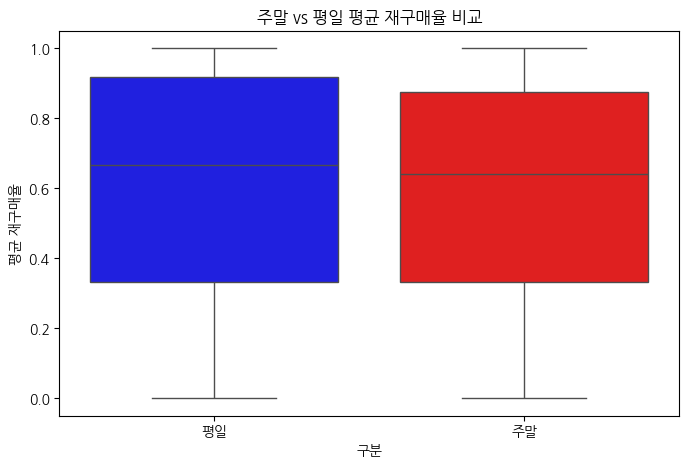

T-statistic (재구매율): -33.29204046357758, p-value: 5.870464054155158e-243


In [ ]:


# 평균 재구매율 계산 (한 주문에서 재구매 비율)
f_orders["avg_reorder_rate"] = f_orders["reorder_cnt"] / f_orders["cart_order_cnt"]

# 주말과 평일의 평균 재구매율 계산
weekend_reorder = f_orders[f_orders["order_dow"].isin([0, 6])]["avg_reorder_rate"]
weekday_reorder = f_orders[~f_orders["order_dow"].isin([0, 6])]["avg_reorder_rate"]

# 시각화
plt.figure(figsize=(8,5))
sns.boxplot(x=f_orders["weekend"], y=f_orders["avg_reorder_rate"], palette=["blue", "red"])
plt.xticks([0, 1], ["평일", "주말"])
plt.xlabel("구분")
plt.ylabel("평균 재구매율")
plt.title("주말 vs 평일 평균 재구매율 비교")
plt.show()

# T-검정 수행
ttest_reorder = ttest_ind(weekend_reorder, weekday_reorder, equal_var=False)

print(f"T-statistic (재구매율): {ttest_reorder.statistic}, p-value: {ttest_reorder.pvalue}")

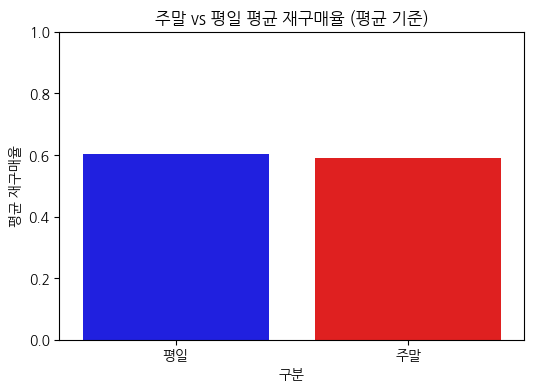

In [ ]:
# 시각적으로는 유의미한 차이가 안보여서 평균기준으로 다시 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 주말 vs 평일 평균 재구매율 비교 (막대 그래프)
plt.figure(figsize=(6,4))
sns.barplot(x=["평일", "주말"], y=[weekday_reorder.mean(), weekend_reorder.mean()], palette=["blue", "red"])

plt.xlabel("구분")
plt.ylabel("평균 재구매율")
plt.title("주말 vs 평일 평균 재구매율 (평균 기준)")
plt.ylim(0, 1)  # 재구매율 범위 0~1
plt.show()

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# 각 그룹에서 랜덤 샘플링 (예: 10,000개씩)
weekend_sample = f_orders[f_orders["weekend"] == 1]["avg_reorder_rate"].sample(10000, random_state=42)
weekday_sample = f_orders[f_orders["weekend"] == 0]["avg_reorder_rate"].sample(10000, random_state=42)

# 다시 T-검정 수행
ttest_reorder_sampled = ttest_ind(weekend_sample, weekday_sample, equal_var=False)

print(f"T-statistic (샘플링 후 재구매율): {ttest_reorder_sampled.statistic}, p-value: {ttest_reorder_sampled.pvalue}")

T-statistic (샘플링 후 재구매율): -1.4626706414734247, p-value: 0.14357324590166648


📌 샘플을 줄이면 p-value가 커짐 → 데이터 크기에 의해 과장된 효과였을 가능성도 높아 기각

## EDA 1 - 사용자들의 구매 주기(재구매패턴)에는 어떤 패턴이 있을까?

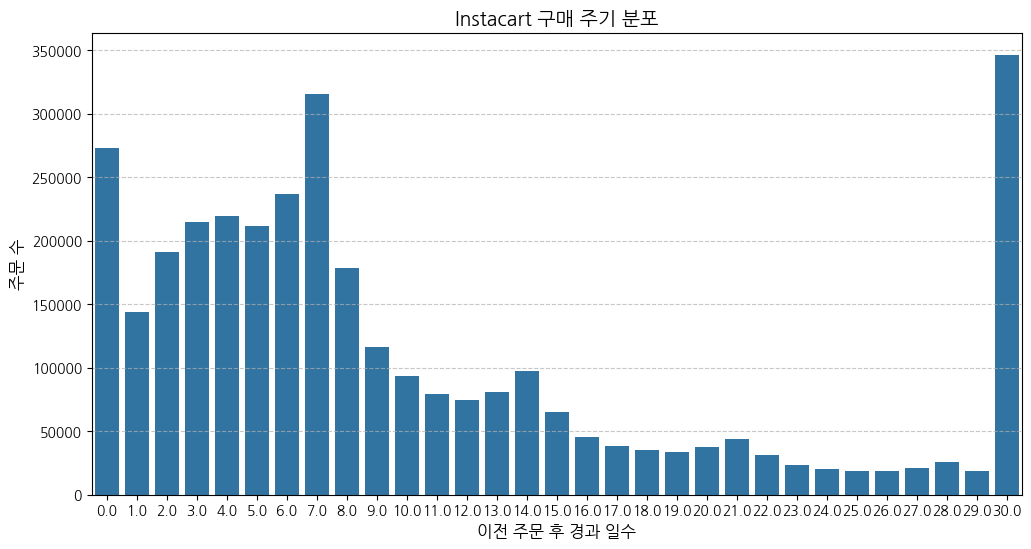

In [ ]:
# 전체 구매주기 분포
plt.figure(figsize=(12,6))  # 그래프 크기 키우기
sns.barplot(
    x=f_orders["days_since_prior_order"].value_counts().index,
    y=f_orders["days_since_prior_order"].value_counts().values,

)

plt.xlabel("이전 주문 후 경과 일수", fontsize=12)
plt.ylabel("주문 수", fontsize=12)
plt.title("Instacart 구매 주기 분포", fontsize=14)
plt.xticks(rotation=0)  # x축 레이블 정렬
plt.grid(axis="y", linestyle="--", alpha=0.7)  # 가독성을 위한 y축 격자 추가
plt.show()

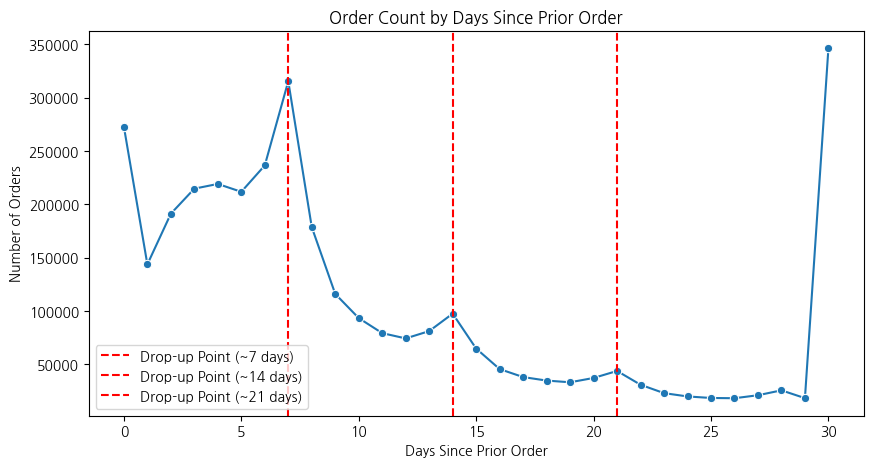

In [ ]:
# 좀더 자세히 보기
days_prior_counts = f_orders['days_since_prior_order'].value_counts().reset_index()
days_prior_counts.columns = ['days_since_prior_order', 'count']  # 컬럼명 지정
days_prior_counts = days_prior_counts.sort_values(by='count', ascending=False)

days_prior_counts = f_orders['days_since_prior_order'].value_counts().reset_index()
days_prior_counts.columns = ['days_since_prior_order', 'count']
days_prior_counts = days_prior_counts.sort_values(by='days_since_prior_order')

# Line Plot (17일 이후 급감 포인트 표시)
plt.figure(figsize=(10,5))
sns.lineplot(x=days_prior_counts["days_since_prior_order"], y=days_prior_counts["count"], marker="o")
# plt.axvline(x=17, color='red', linestyle='--', label="Drop-off Point (~17 days)")
plt.axvline(x=7, color='red', linestyle='--', label="Drop-up Point (~7 days)")
plt.axvline(x=14, color='red', linestyle='--', label="Drop-up Point (~14 days)")
plt.axvline(x=21, color='red', linestyle='--', label="Drop-up Point (~21 days)")
plt.xlabel("Days Since Prior Order")
plt.ylabel("Number of Orders")
plt.title("Order Count by Days Since Prior Order")
plt.legend()
plt.show()

- 7,14,21,30일에 구매가 상승하는 패턴을 볼 수 있음  
- 왜 그럴까??

### 추가 가설

(1) 주간 쇼핑 습관 (Weekly Shopping Pattern)  
	•	사람들이 일정한 요일(예: 주말, 월요일)에 장을 보는 습관을 가질 가능성이 높음.  
	•	특히 매주 같은 요일(예: 토요일)에 장을 본다면, 재구매 주기가 7일(또는 14일)로 나타날 가능성이 큼.

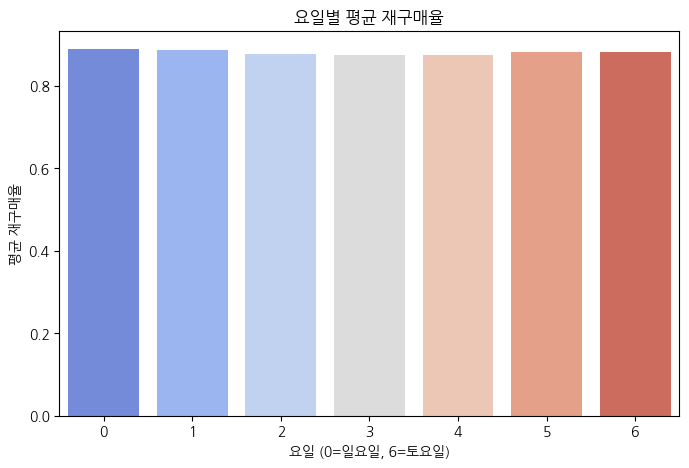

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 요일별 평균 재구매율 계산
dow_reorder_rate = f_orders.groupby("order_dow")["is_reorder"].mean().reset_index()

# 시각화
plt.figure(figsize=(8,5))
sns.barplot(data=dow_reorder_rate, x="order_dow", y="is_reorder", palette="coolwarm")
plt.xlabel("요일 (0=일요일, 6=토요일)")
plt.ylabel("평균 재구매율")
plt.title("요일별 평균 재구매율")
plt.show()

첫번째 추가가설 기각!

### 추가가설 2 : 정기적 장보기 패턴 (Subscription-like Shopping)  
* Instacart 사용 고객 중 일부는 고정된 주기로 생필품을 구매하는 경향이 있을 수 있음.  
* 예를 들어, 매주/격주/한 달마다 정기적으로 장을 보는 고객이 많다면 7일, 14일, 30일 주기가 자주 나타날 것.   

검증 방법: 개별 고객의 장보기 패턴 분석

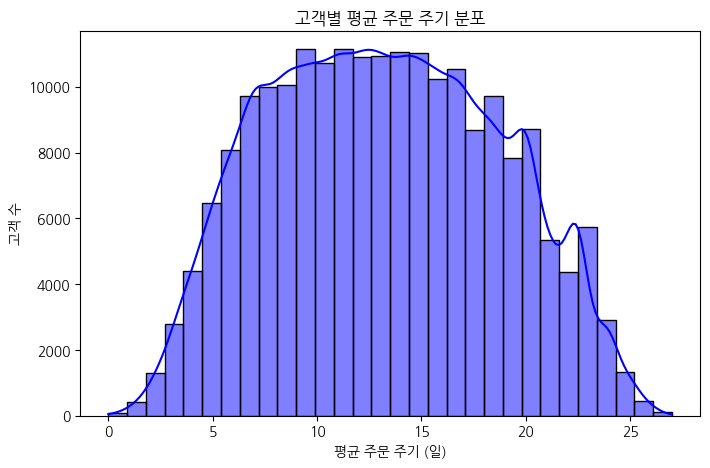

In [ ]:
# 고객별 평균 주문 주기 계산
customer_order_cycle = f_orders.groupby("user_id")["days_since_prior_order"].mean().reset_index()

# 시각화
plt.figure(figsize=(8,5))
sns.histplot(customer_order_cycle["days_since_prior_order"], bins=30, kde=True, color="blue")
plt.xlabel("평균 주문 주기 (일)")
plt.ylabel("고객 수")
plt.title("고객별 평균 주문 주기 분포")
plt.show()

두번째 가설도 기각..

### 세번째 추가가설 :고객 개별 수준에서 특정 주기(7일, 14일, 30일)로 반복적으로 주문하는 고객이 많은지 확인

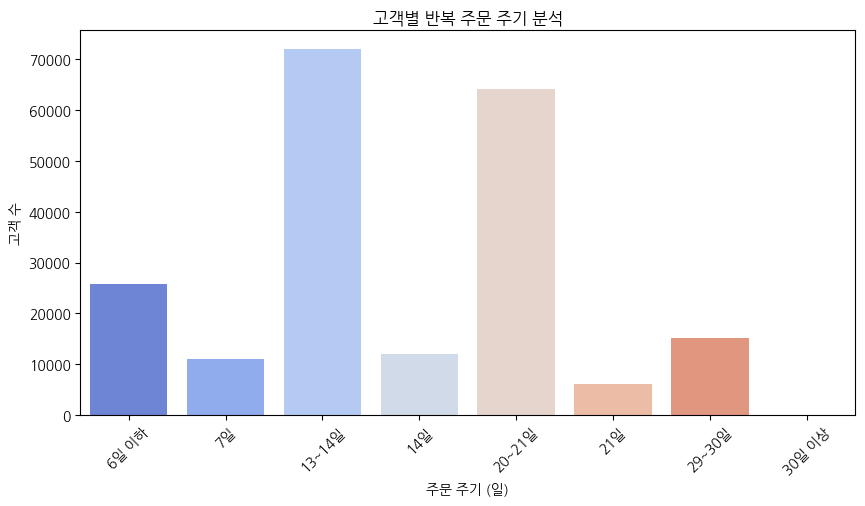

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 고객별 평균 주문 주기 계산
customer_order_cycle = f_orders.groupby("user_id")["days_since_prior_order"].mean().reset_index()

# 특정 주기로 반복해서 주문하는 고객 비율 확인
bins = [0, 6.5, 7.5, 13.5, 14.5, 20.5, 21.5, 29.5, 30.5]
labels = ["6일 이하", "7일", "13~14일", "14일", "20~21일", "21일", "29~30일", "30일 이상"]

customer_order_cycle["order_cycle_category"] = pd.cut(customer_order_cycle["days_since_prior_order"], bins=bins, labels=labels)

# 카테고리별 고객 수 분포 시각화
plt.figure(figsize=(10,5))
sns.barplot(x=customer_order_cycle["order_cycle_category"].value_counts().index,
            y=customer_order_cycle["order_cycle_category"].value_counts().values,
            palette="coolwarm")
plt.xlabel("주문 주기 (일)")
plt.ylabel("고객 수")
plt.title("고객별 반복 주문 주기 분석")
plt.xticks(rotation=45)
plt.show()

- 개별 고객군별로 14,21일에 구매 패턴이 높아짐!
### 추가 검증:  주기적으로 반복 구매하는 고객들은 어떤 상품/카테고리를 구매할까?

In [ ]:
# order - product 잇는 테이블 'orders_product_f' 불러오기
orders_products_f = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IM/orders_products_f.csv")
orders_products_f.head(1)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,price,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,4.42,yogurt,dairy eggs


In [ ]:
f_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,cart_order_cnt,reorder_cnt,total_price,max_price,total_reordered_price,is_reorder,weekend,avg_reorder_rate
0,2539329,1,prior,1,2,8,0.0,5,0,12.06,42.11,0.00,0,0,0.000
1,2398795,1,prior,2,3,7,15.0,6,3,35.37,75.12,32.72,1,0,0.500
2,473747,1,prior,3,3,12,21.0,5,3,12.06,39.80,23.54,1,0,0.600
3,2254736,1,prior,4,4,7,29.0,5,5,12.06,36.71,36.71,1,0,1.000
4,431534,1,prior,5,4,15,28.0,8,5,35.37,106.09,66.59,1,0,0.625


- 이렇게 특정 주기를 가진 고객들이 자주 구매하는 물품은?

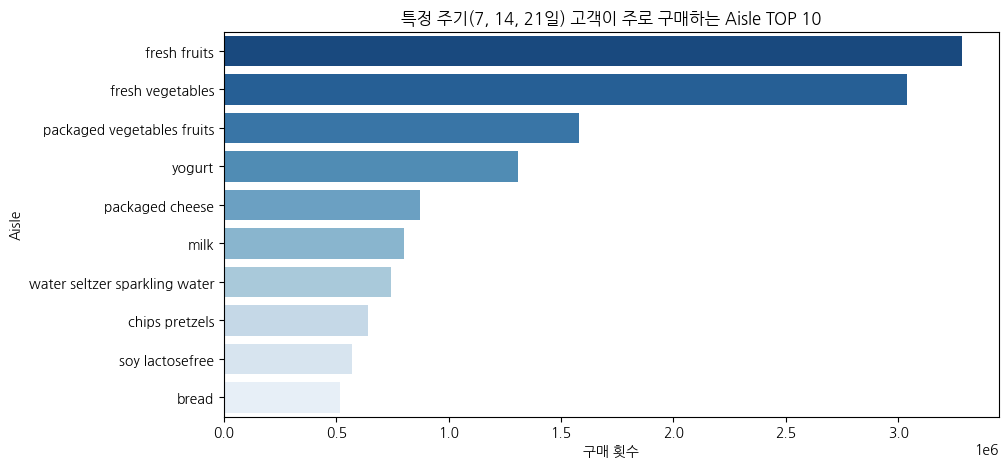

In [ ]:
# 특정 주기 고객만 필터링 (7, 14, 21일 주기로 구매하는 고객)
selected_users = f_orders[f_orders["days_since_prior_order"].isin([7, 14, 21])]["user_id"].unique()

# 특정 주기 고객의 order_id 가져오기
selected_orders = f_orders[f_orders["user_id"].isin(selected_users)]["order_id"].unique()

# 특정 주기 고객이 구매한 제품 필터링
selected_products = orders_products_f[orders_products_f["order_id"].isin(selected_orders)]

import matplotlib.pyplot as plt
import seaborn as sns

# 특정 주기 고객이 가장 많이 구매한 aisle 집계
aisle_counts = selected_products["aisle"].value_counts().reset_index()
aisle_counts.columns = ["aisle", "count"]

# 상위 10개 aisle 시각화
top_aisles = aisle_counts.head(10)

plt.figure(figsize=(10,5))
sns.barplot(data=top_aisles, x="count", y="aisle", palette="Blues_r")
plt.xlabel("구매 횟수")
plt.ylabel("Aisle")
plt.title("특정 주기(7, 14, 21일) 고객이 주로 구매하는 Aisle TOP 10")
plt.show()

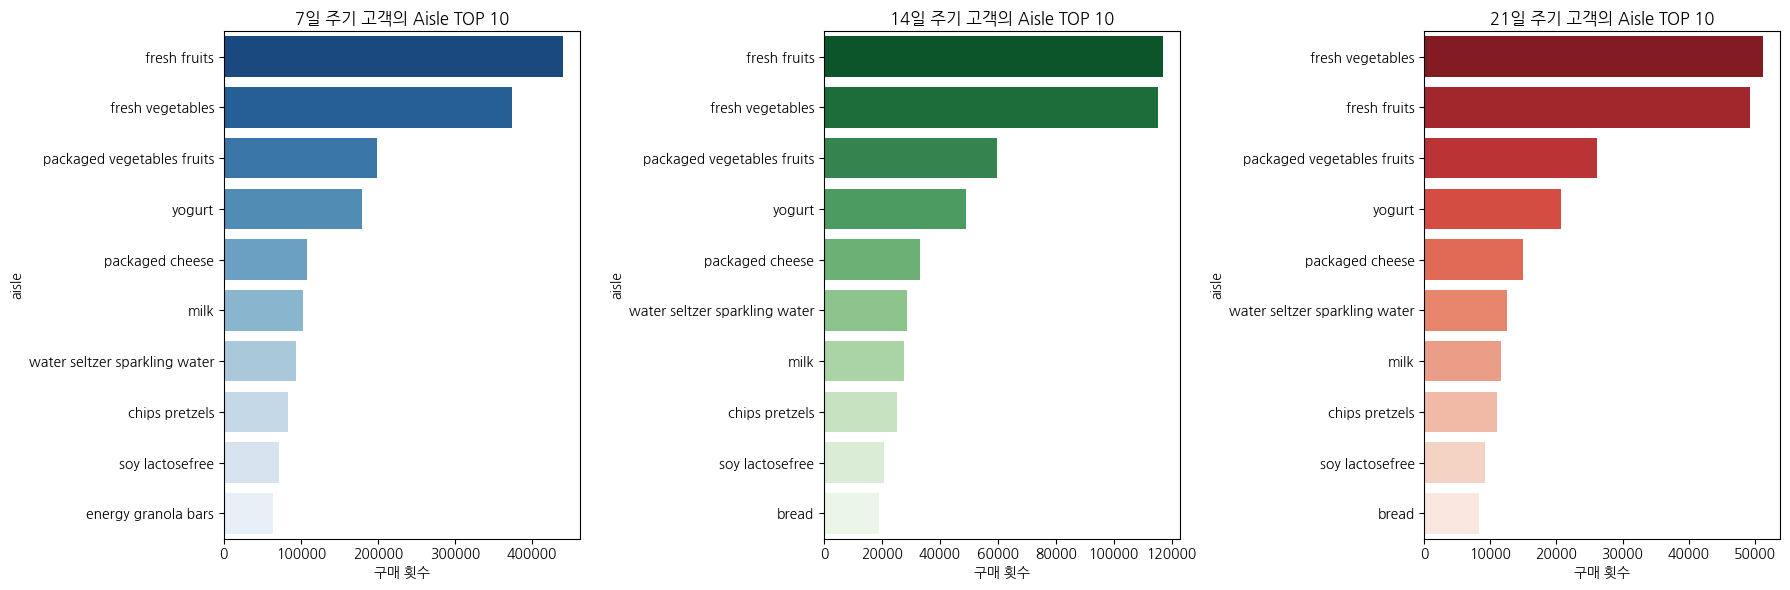

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 고객 주기별 order_id 추출
orders_7d = f_orders[f_orders["days_since_prior_order"] == 7]["order_id"].unique()
orders_14d = f_orders[f_orders["days_since_prior_order"] == 14]["order_id"].unique()
orders_21d = f_orders[f_orders["days_since_prior_order"] == 21]["order_id"].unique()

# 각 고객군의 주문 상품 필터링
products_7d = orders_products_f[orders_products_f["order_id"].isin(orders_7d)]
products_14d = orders_products_f[orders_products_f["order_id"].isin(orders_14d)]
products_21d = orders_products_f[orders_products_f["order_id"].isin(orders_21d)]

# 각 고객군별 aisle(소분류)별 주문량 집계
aisle_counts_7d = products_7d["aisle"].value_counts().reset_index().head(10)
aisle_counts_14d = products_14d["aisle"].value_counts().reset_index().head(10)
aisle_counts_21d = products_21d["aisle"].value_counts().reset_index().head(10)

# 그래프 그리기
fig, axes = plt.subplots(1, 3, figsize=(18,6))

sns.barplot(data=aisle_counts_7d, x="count", y="aisle", palette="Blues_r", ax=axes[0])
axes[0].set_title("7일 주기 고객의 Aisle TOP 10")
axes[0].set_xlabel("구매 횟수")

sns.barplot(data=aisle_counts_14d, x="count", y="aisle", palette="Greens_r", ax=axes[1])
axes[1].set_title("14일 주기 고객의 Aisle TOP 10")
axes[1].set_xlabel("구매 횟수")

sns.barplot(data=aisle_counts_21d, x="count", y="aisle", palette="Reds_r", ax=axes[2])
axes[2].set_title("21일 주기 고객의 Aisle TOP 10")
axes[2].set_xlabel("구매 횟수")

plt.tight_layout()
plt.show()

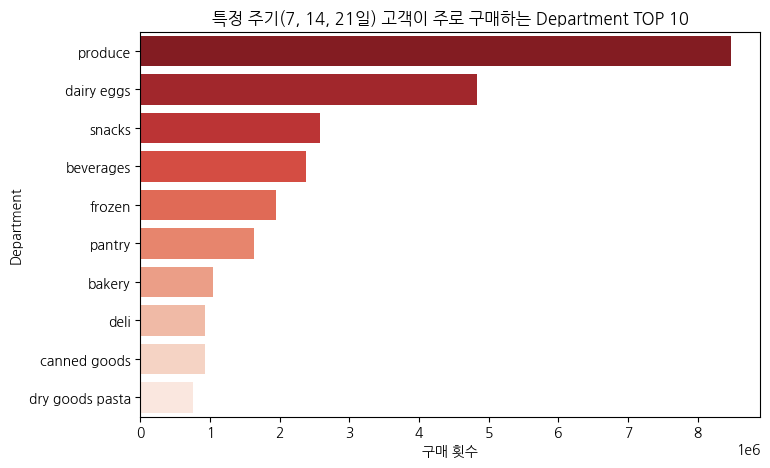

In [ ]:
# 특정 주기 고객이 가장 많이 구매한 department 집계
department_counts = selected_products["department"].value_counts().reset_index()
department_counts.columns = ["department", "count"]

# 상위 10개 department 시각화
top_departments = department_counts.head(10)

plt.figure(figsize=(8,5))
sns.barplot(data=top_departments, x="count", y="department", palette="Reds_r")
plt.xlabel("구매 횟수")
plt.ylabel("Department")
plt.title("특정 주기(7, 14, 21일) 고객이 주로 구매하는 Department TOP 10")
plt.show()

- 추가로 확인하면 좋을 것들
1. Instacart의 마케팅 활동이 특정 주기에 영향을 주는지 검토
2. 정기구매 상품이 있는지 검토


## EDA 2 - 특별히 잘(쟈주,많이) 팔리는 카테고리/ aisle/ 프로덕트가 있을까?  

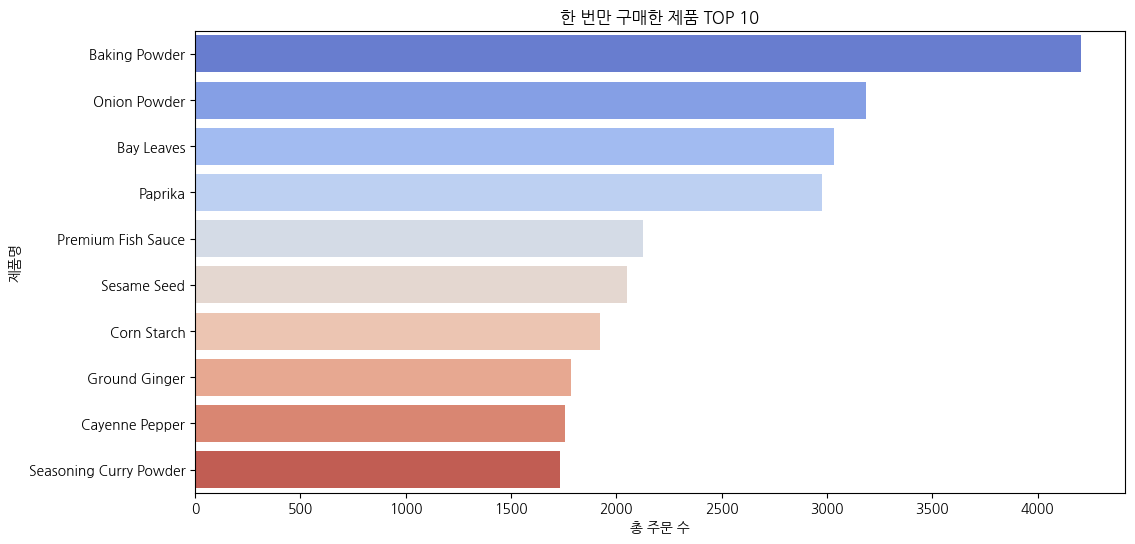

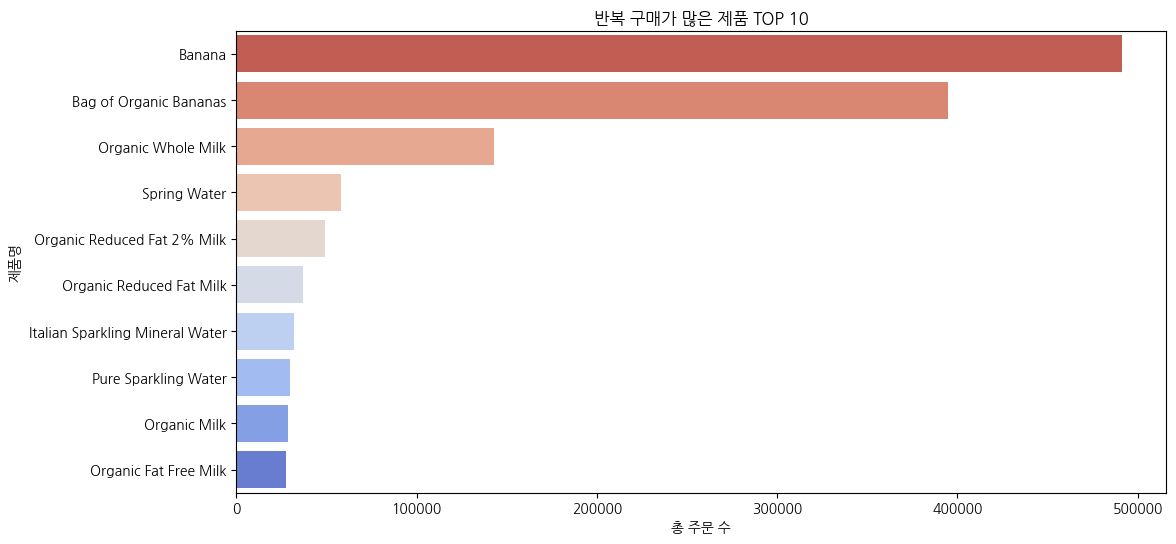

In [ ]:
# 제품별 재구매 횟수 및 재구매율 계산
product_reorder_analysis = orders_products_f.groupby("product_name").agg(
    total_orders=("order_id", "count"),
    reorder_count=("reordered", "sum"),
    reorder_ratio=("reordered", "mean")
).reset_index()

# 한 번만 구매하고 끝난 제품 (재구매율 10% 미만, 50회 이상 팔린 제품)
one_time_products = product_reorder_analysis[(product_reorder_analysis["reorder_ratio"] < 0.1) &
                                             (product_reorder_analysis["total_orders"] > 50)]

# 반복 구매 제품 (재구매율 80% 이상, 50회 이상 팔린 제품)
high_reorder_products = product_reorder_analysis[(product_reorder_analysis["reorder_ratio"] > 0.8) &
                                                 (product_reorder_analysis["total_orders"] > 50)]

# 한 번만 구매한 제품 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=one_time_products.sort_values(by="total_orders", ascending=False).head(10),
            x="total_orders", y="product_name", palette="coolwarm")
plt.xlabel("총 주문 수")
plt.ylabel("제품명")
plt.title("한 번만 구매한 제품 TOP 10")
plt.show()

# 반복 구매가 많은 제품 시각화
plt.figure(figsize=(12, 6))
sns.barplot(data=high_reorder_products.sort_values(by="total_orders", ascending=False).head(10),
            x="total_orders", y="product_name", palette="coolwarm_r")
plt.xlabel("총 주문 수")
plt.ylabel("제품명")
plt.title("반복 구매가 많은 제품 TOP 10")
plt.show()

# Users 기반 EDA

### 1. 총 주문 횟수(frequency)가 높은 고객은 평균 재구매 주기(avg_days_since_prior_order)가 짧을 것이다.

                                    Hypothesis  Pearson Correlation  p-value
0  H7: frequency vs avg_days_since_prior_order             -0.51814      0.0


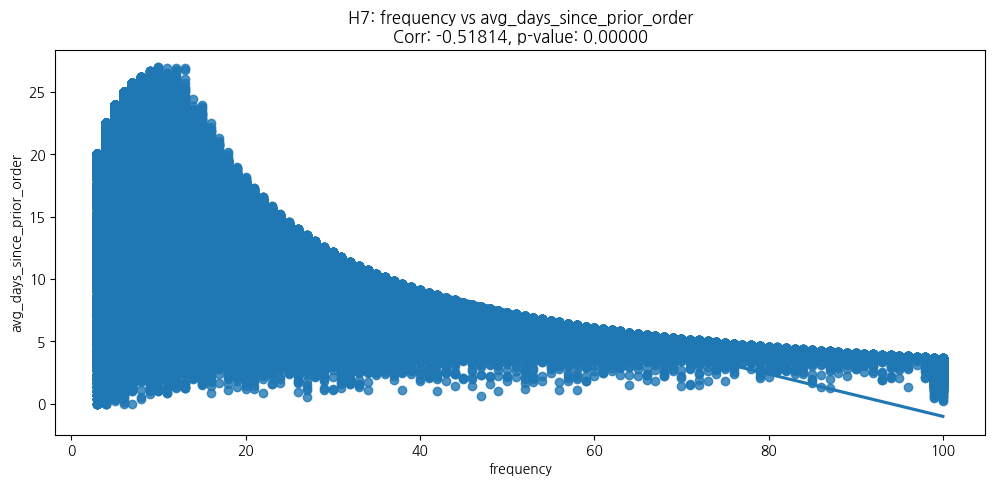

In [ ]:

from scipy.stats import pearsonr

# 총 주문 횟수(frequency)와 평균 재구매 주기(avg_days_since_prior_order)의 관계
corr_h7, p_value_h7 = pearsonr(users["frequency"], users["avg_days_since_prior_order"])

# 결과 데이터프레임 생성 (p-value를 소수점 5자리까지 반올림)
correlation_results_h7 = pd.DataFrame({
    "Hypothesis": ["H7: frequency vs avg_days_since_prior_order"],
    "Pearson Correlation": [round(corr_h7, 5)],
    "p-value": [round(p_value_h7, 5)]
})

# Correlation 결과 출력
print(correlation_results_h7)

# 시각화
plt.figure(figsize=(12, 5))
sns.regplot(x=users["frequency"], y=users["avg_days_since_prior_order"])
plt.title(f"H7: frequency vs avg_days_since_prior_order\nCorr: {corr_h7:.5f}, p-value: {p_value_h7:.5f}")
plt.show()


유의미한 관계

### 2. 총주문횟수(frequency)가 많을수록 평균 재구매 품목 수(avg_reorder_cnt)가 증가 할것이다.

회귀 계수 (기울기): 0.08113
절편: 3.25932


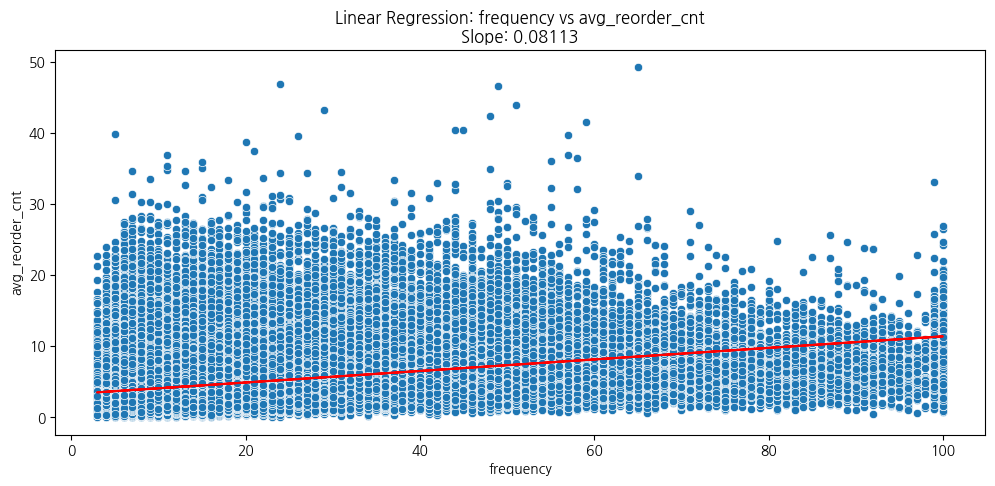

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

X = users["frequency"].values.reshape(-1, 1)
y = users["avg_reorder_cnt"].values

# 회귀 모델 생성 및 학습
model = LinearRegression()
model.fit(X, y)

# 기울기(회귀 계수)와 절편 확인
slope = model.coef_[0]
intercept = model.intercept_

print(f"회귀 계수 (기울기): {slope:.5f}")
print(f"절편: {intercept:.5f}")

# 시각화
plt.figure(figsize=(12, 5))
sns.scatterplot(x=users["frequency"], y=users["avg_reorder_cnt"])
plt.plot(users["frequency"], model.predict(X), color="red")  # 회귀선 추가
plt.title(f"Linear Regression: frequency vs avg_reorder_cnt\nSlope: {slope:.5f}")
plt.show()

선형성이 발견되었다!